In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns",40)

**Step1: Read the pyclone output loci.txt for heatmap**

In [2]:
filename="Pyclone_output"

In [3]:
a=pd.read_csv("loci.tsv",delimiter="\t")
a=pd.pivot_table(a,index=["mutation_id","cluster_id"],columns='sample_id', values='cellular_prevalence')
a=a.sort_values(['cluster_id'], ascending=[True])  

**Step2: create a output directory**

In [4]:
if not os.path.exists(filename):
    os.mkdir(filename)
    print("Directory " , filename ,  " Created ")
else:    
    print("Directory " , filename ,  " already exists") 

Directory  Pyclone_output  Created 


**Step3: store  output in created directory**

In [6]:
#change to outputdirectory and write file 
os.chdir("/Users/sarunach/Desktop/Python_panda_scripts/Visualizing_Pyclone_Output/Pyclone_output")
if not os.path.isfile("Heatmap_CP.xlsx"):
    a.to_excel("Pyclone_CP.xlsx")
    print("Excelsheet for " , filename ,  " is Created ")
else:    
    print("Excelsheet for " , filename ,  " already exists")

Excelsheet for  Pyclone_output  is Created 


**Step4:Go to output and Read the same excel sheet**

In [7]:
df=pd.read_excel("Pyclone_CP.xlsx", index_col=None)
#plot=df
#plot.drop(plot.columns[0:2], axis = 1, inplace=True) 
#plt.figure(figsize=(4, 6))
#sns.heatmap(plot, cmap="Blues",yticklabels=False) 
df.head()

,mutation_id,cluster_id,Sample_1,Sample_2,Sample_3
0,XPNPEP2:chrX.128888451.C.T,1,0.486760,0.011121,0.008932
1,TPH2:chr12.72425820.G.T,1,0.452527,0.011258,0.008639
2,TNS4:chr17.38643384.C.T,1,0.486686,0.011205,0.008994
3,RYR2:chr1.237947620.C.T,1,0.485696,0.011254,0.009029
4,PPP2R2C:chr4.6349736.G.T,1,0.486606,0.011104,0.008938


In [8]:
df.columns = df.columns.str.replace(filename+"_","")# replace  and rename the columns 
df= df.add_suffix('-CP')# add CP to all column heades
df.columns = df.columns.str.replace("_id-CP","_id")

In [9]:
df.head()

,mutation_id,cluster_id,Sample_1-CP,Sample_2-CP,Sample_3-CP
0,XPNPEP2:chrX.128888451.C.T,1,0.486760,0.011121,0.008932
1,TPH2:chr12.72425820.G.T,1,0.452527,0.011258,0.008639
2,TNS4:chr17.38643384.C.T,1,0.486686,0.011205,0.008994
3,RYR2:chr1.237947620.C.T,1,0.485696,0.011254,0.009029
4,PPP2R2C:chr4.6349736.G.T,1,0.486606,0.011104,0.008938


In [10]:
plot = df.filter(regex='-CP')
plot.head()

,Sample_1-CP,Sample_2-CP,Sample_3-CP
0,0.486760,0.011121,0.008932
1,0.452527,0.011258,0.008639
2,0.486686,0.011205,0.008994
3,0.485696,0.011254,0.009029
4,0.486606,0.011104,0.008938


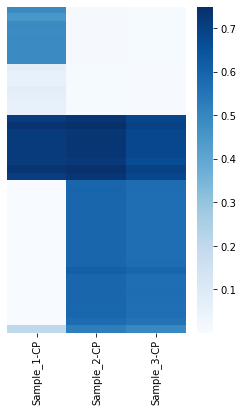

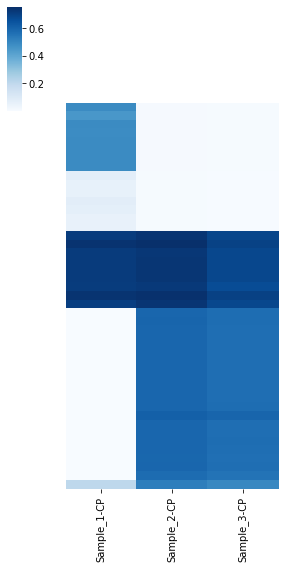

In [11]:
plt.figure(figsize=(4, 6))
sns.heatmap(plot, cmap="Blues",yticklabels=False) 
c=sns.clustermap(plot,col_cluster=False, row_cluster=False,cmap="Blues",yticklabels=False,figsize=(4,8))

In [12]:
c.savefig(filename+".pdf",format='pdf',dpi=1200)